In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Read CSV files and basic data cleaning

In [3]:
import glob 

path = ('./../data/')
csv_files = glob.glob('./../data/*.csv')

li = []

for filename in csv_files:
    frame = pd.read_csv(filename)
    li.append(frame)

df = pd.concat(li)

In [4]:
df.shape

(5339131, 13)

In [5]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6842AA605EE9FBB3,electric_bike,2023-03-16 08:20:34,2023-03-16 08:22:52,Clark St & Armitage Ave,13146,Larrabee St & Webster Ave,13193,41.918413,-87.636451,41.921822,-87.644140,member
1,F984267A75B99A8C,electric_bike,2023-03-04 14:07:06,2023-03-04 14:15:31,Public Rack - Kedzie Ave & Argyle St,491,NaN,NaN,41.970000,-87.710000,41.950000,-87.710000,member
2,FF7CF57CFE026D02,classic_bike,2023-03-31 12:28:09,2023-03-31 12:38:47,Orleans St & Chestnut St (NEXT Apts),620,Clark St & Randolph St,TA1305000030,41.898203,-87.637536,41.884576,-87.631890,member
3,6B61B916032CB6D6,classic_bike,2023-03-22 14:09:08,2023-03-22 14:24:51,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Kingsbury St,13154,41.888716,-87.644448,41.910522,-87.653106,member
4,E55E61A5F1260040,electric_bike,2023-03-09 07:15:00,2023-03-09 07:26:00,Walsh Park,18067,Sangamon St & Lake St,TA1306000015,41.914480,-87.668013,41.885779,-87.651025,member


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5339131 entries, 0 to 224072
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 570.3+ MB


In [7]:
round((df.isna().sum()/len(df))*100,2) #Calculate the percentage of missing rows

ride_id                0.00
rideable_type          0.00
started_at             0.00
ended_at               0.00
start_station_name    15.42
start_station_id      15.42
end_station_name      16.38
end_station_id        16.38
start_lat              0.00
start_lng              0.00
end_lat                0.13
end_lng                0.13
member_casual          0.00
dtype: float64

In [8]:
df.dropna(subset = ['end_lat','end_lng'], inplace= True) #Drop empty rows from end_lat and end_lng columns, because the nan ratio is less than 1%
len(df)

5332384

In [9]:
df[df['start_station_name'].isna()].head() #Check some rows with NaN values

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
53,3142E377EBCCB367,electric_bike,2023-03-11 18:30:32,2023-03-11 18:34:49,NaN,NaN,Halsted St & Roscoe St,TA1309000025,41.94,-87.67,41.943670,-87.648950,member
54,8FF131C54B5715EE,electric_bike,2023-03-01 15:14:40,2023-03-01 15:20:15,NaN,NaN,Aberdeen St & Jackson Blvd,13157,41.88,-87.65,41.877726,-87.654787,member
55,E3B2D3B33BDF1905,electric_bike,2023-03-31 18:36:06,2023-03-31 18:41:47,NaN,NaN,Halsted St & Roscoe St,TA1309000025,41.94,-87.67,41.943670,-87.648950,member
84,B312BC01D6200B6D,electric_bike,2023-03-08 17:35:14,2023-03-08 17:48:03,NaN,NaN,Aberdeen St & Randolph St,18062,41.89,-87.63,41.884114,-87.654264,member
85,1B633ECB01A1715C,electric_bike,2023-03-30 06:54:50,2023-03-30 07:10:48,NaN,NaN,Aberdeen St & Randolph St,18062,41.91,-87.69,41.884114,-87.654264,member


- Maybe can I replace the missing start and end values according the GPS info?

In [10]:
df['end_station_name'].value_counts()

end_station_name
Streeter Dr & Grand Ave                     62793
DuSable Lake Shore Dr & North Blvd          38740
DuSable Lake Shore Dr & Monroe St           37244
Michigan Ave & Oak St                       37003
Clark St & Elm St                           32377
                                            ...  
Public Rack - West Chatham Park                 1
Public Rack - S Kostner Ave & W 18th Pl         1
Public Rack - Baker Ave & 863rd Pl              1
Public Rack - Lafayette Ave & 87th St SW        1
Public Rack - Harvard Ave & 103rd St            1
Name: count, Length: 1589, dtype: int64

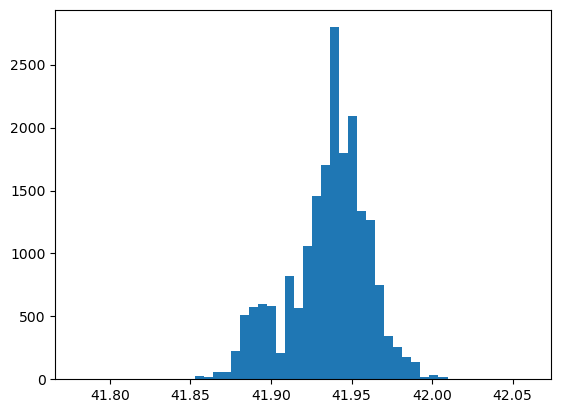

In [11]:
plt.hist(df[df['end_station_name']=='Halsted St & Roscoe St']['start_lat'],bins=50);

<Axes: xlabel='start_lat', ylabel='start_lng'>

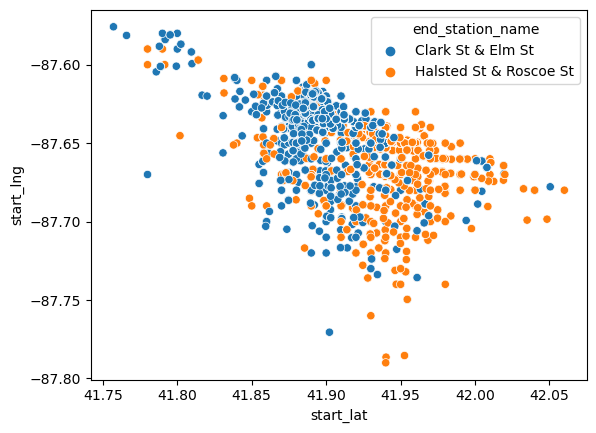

In [12]:
sns.scatterplot(data= df[(df['end_station_name']=='Halsted St & Roscoe St') | (df['end_station_name']=='Clark St & Elm St')], x='start_lat', y='start_lng', hue='end_station_name')
# Cant predict the station names because the coordinates variing within a single station name

- Convert dates (object) to datetime

In [13]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [14]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
df.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

In [15]:
# Ensure data integrity

df['ride_id'].nunique() # 5332384 --- OK, each value is unique
df['rideable_type'].unique() # array(['electric_bike', 'classic_bike', 'docked_bike'], dtype=object) --- OK
df['member_casual'].unique() # array(['member', 'casual'], dtype=object) --- OK

array(['member', 'casual'], dtype=object)

## Analysis

In [16]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6842AA605EE9FBB3,electric_bike,2023-03-16 08:20:34,2023-03-16 08:22:52,Clark St & Armitage Ave,13146,Larrabee St & Webster Ave,13193,41.918413,-87.636451,41.921822,-87.644140,member
1,F984267A75B99A8C,electric_bike,2023-03-04 14:07:06,2023-03-04 14:15:31,Public Rack - Kedzie Ave & Argyle St,491,NaN,NaN,41.970000,-87.710000,41.950000,-87.710000,member
2,FF7CF57CFE026D02,classic_bike,2023-03-31 12:28:09,2023-03-31 12:38:47,Orleans St & Chestnut St (NEXT Apts),620,Clark St & Randolph St,TA1305000030,41.898203,-87.637536,41.884576,-87.631890,member
3,6B61B916032CB6D6,classic_bike,2023-03-22 14:09:08,2023-03-22 14:24:51,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Kingsbury St,13154,41.888716,-87.644448,41.910522,-87.653106,member
4,E55E61A5F1260040,electric_bike,2023-03-09 07:15:00,2023-03-09 07:26:00,Walsh Park,18067,Sangamon St & Lake St,TA1306000015,41.914480,-87.668013,41.885779,-87.651025,member


<Axes: xlabel='started_at', ylabel='ride_id'>

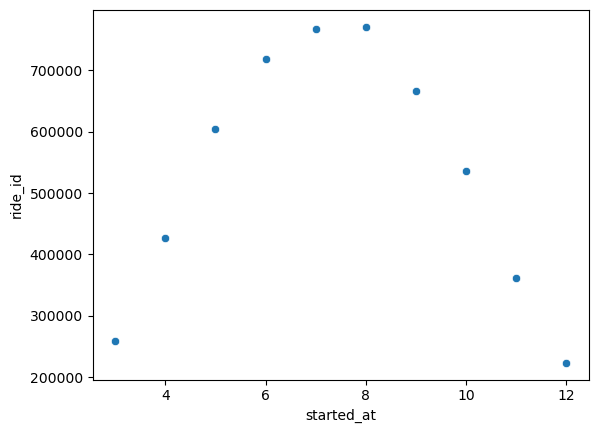

In [17]:
sns.scatterplot(x = df.groupby(df['started_at'].dt.month)['ride_id'].count().index, y = df.groupby(df['started_at'].dt.month)['ride_id'].count()) # trend by months by total users

### Q to A:
- 1 What type of bikes do members use?
- 2 There are time trend in member usage?
- 3 Most important start and end locations for members and casuals
- 4 Calculate the average ride_length for members and casual riders
- 5 Calculate the average for users by day_of_week
- 6 Calculate the average for users by weekdays and weekend_days

In [253]:
#sns.countplot(data=df,x='ride_id',hue='member_casual')

KeyboardInterrupt: 

<Axes: xlabel='rideable_type', ylabel='count'>

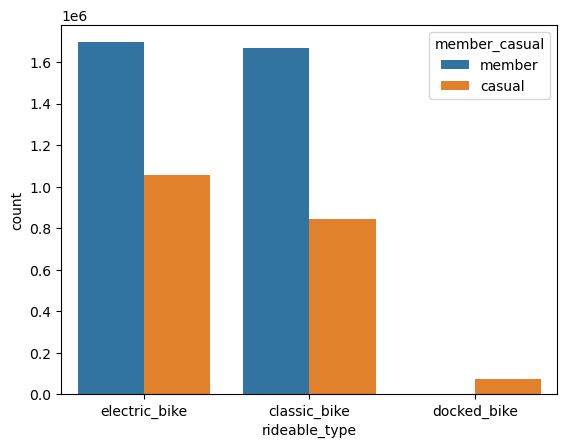

In [18]:
#1
sns.countplot(data=df,x='rideable_type',hue='member_casual')

In [19]:
#2
df['month'] = df['started_at'].dt.month
df.groupby(['month','member_casual']).count()

ride_id  rideable_type  started_at  ended_at  \
month member_casual                                                 
3     casual           62049          62049       62049     62049   
      member          196446         196446      196446    196446   
4     casual          146894         146894      146894    146894   
      member          279261         279261      279261    279261   
5     casual          233591         233591      233591    233591   
      member          370526         370526      370526    370526   
6     casual          300440         300440      300440    300440   
      member          418289         418289      418289    418289   
7     casual          330248         330248      330248    330248   
      member          436148         436148      436148    436148   
8     casual          310055         310055      310055    310055   
      member          460381         460381      460381    460381   
9     casual          260937         260937      260937    260937   
      member          404596         404596      404596    404596   
10    casual          176617         176617      176617    176617   
      member          359904         359904      359904    359904   
11    casual           98145          98145       98145     98145   
      member          264023         264023      264023    264023   
12    casual           51504          51504       51504     51504   
      member          172330         172330      172330    172330   

                     start_station_name  start_station_id  end_station_name  \
month member_casual                                                           
3     casual                      52755             52755             51126   
      member                     169830            169830            169114   
4     casual                     124716            124716            120631   
      member                     237625            237625            237329   
5     casual                     198527            198527            192412   
      member                     316350            316350            317148   
6     casual                     250454            250454            242010   
      member                     352016            352016            353548   
7     casual                     276549            276549            268923   
      member                     366904            366904            368358   
8     casual                     261639            261639            255156   
      member                     389878            389878            390928   
9     casual                     220543            220543            215012   
      member                     343678            343678            344068   
10    casual                     147576            147576            143100   
      member                     304533            304533            304760   
11    casual                      82102             82102             79509   
      member                     225063            225063            225110   
12    casual                      42360             42360             40916   
      member                     145764            145764            145233   

                     end_station_id  start_lat  start_lng  end_lat  end_lng  
month member_casual                                                          
3     casual                  51126      62049      62049    62049    62049  
      member                 169114     196446     196446   196446   196446  
4     casual                 120631     146894     146894   146894   146894  
      member                 237329     279261     279261   279261   279261  
5     casual                 192412     233591     233591   233591   233591  
      member                 317148     370526     370526   370526   370526  
6     casual                 242010     300440     300440   300440   300440  
      member                 353548     418289     418289   4

<Axes: xlabel='month'>

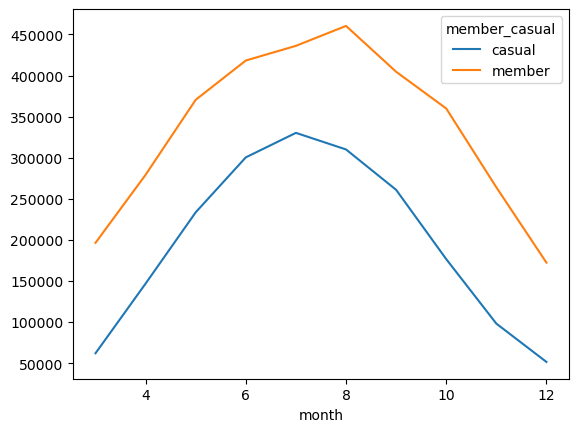

In [20]:
sns.lineplot(x = df.groupby(['month','member_casual']).count().index.get_level_values(0), y = df.groupby(['month','member_casual']).count()['ride_id'].to_numpy(), hue=df.groupby(['month','member_casual']).count().index.get_level_values(1))

# No identifiable trend from this

In [139]:
#3

df_most_pop = pd.DataFrame()

#df.groupby('start_station_name').count().sort_values(['ride_id'],ascending=False)
#df.groupby('end_station_name').count().sort_values(['ride_id'],ascending=False)

df_most_pop['casual_start_station']=df[df['member_casual']=='casual']['start_station_name'].value_counts()[:3].index
for row in range(3):
    df_most_pop.at[row,'casual_start_lat'] = df[df['start_station_name']==(df_most_pop['casual_start_station'][row])]['start_lat'].median()
for row in range(3):
    df_most_pop.at[row,'casual_start_lng'] = df[df['start_station_name']==(df_most_pop['casual_start_station'][row])]['start_lng'].median()

df_most_pop['member_start_station']=df[df['member_casual']=='member']['start_station_name'].value_counts()[:3].index
for row in range(3):
    df_most_pop.at[row,'member_start_lat'] = df[df['start_station_name']==(df_most_pop['member_start_station'][row])]['start_lat'].median()
for row in range(3):
    df_most_pop.at[row,'member_start_lng'] = df[df['start_station_name']==(df_most_pop['member_start_station'][row])]['start_lng'].median()

df_most_pop['casual_end_station']=df[df['member_casual']=='casual']['end_station_name'].value_counts()[:3].index
for row in range(3):
    df_most_pop.at[row,'casual_end_lat'] = df[df['start_station_name']==(df_most_pop['casual_end_station'][row])]['end_lat'].median()
for row in range(3):
    df_most_pop.at[row,'casual_end_lng'] = df[df['start_station_name']==(df_most_pop['casual_end_station'][row])]['end_lng'].median()
    
df_most_pop['member_end_station']=df[df['member_casual']=='member']['end_station_name'].value_counts()[:3].index
for row in range(3):
    df_most_pop.at[row,'member_end_lat'] = df[df['start_station_name']==(df_most_pop['member_end_station'][row])]['end_lat'].median()
for row in range(3):
    df_most_pop.at[row,'member_end_lng'] = df[df['start_station_name']==(df_most_pop['member_end_station'][row])]['end_lng'].median()

df_most_pop


,casual_start_station,casual_start_lat,casual_start_lng,member_start_station,member_start_lat,member_start_lng,casual_end_station,casual_end_lat,casual_end_lng,member_end_station,member_end_lat,member_end_lng
0,Streeter Dr & Grand Ave,41.892278,-87.612043,Kingsbury St & Kinzie St,41.889177,-87.638506,Streeter Dr & Grand Ave,41.892278,-87.624084,Clinton St & Washington Blvd,41.89,-87.639573
1,DuSable Lake Shore Dr & Monroe St,41.880958,-87.616743,Clinton St & Washington Blvd,41.883380,-87.641170,DuSable Lake Shore Dr & Monroe St,41.882134,-87.616743,Kingsbury St & Kinzie St,41.89,-87.640981
2,Michigan Ave & Oak St,41.900960,-87.623777,Clark St & Elm St,41.902973,-87.631280,Michigan Ave & Oak St,41.900960,-87.630834,Clark St & Elm St,41.90,-87.634656


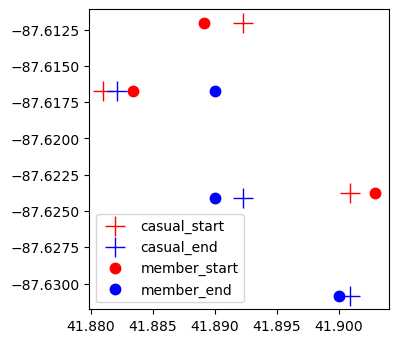

In [142]:
fig = plt.figure(figsize=(3,3))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.plot(df_most_pop['casual_start_lat'],df_most_pop['casual_start_lng'],marker='+',color='r',markersize=15,linewidth=0,label='casual_start')
axes.plot(df_most_pop['casual_end_lat'],df_most_pop['casual_end_lng'],marker='+',color='b',markersize=15,linewidth=0,label='casual_end')
axes.plot(df_most_pop['member_start_lat'],df_most_pop['casual_start_lng'],marker='.',color='r',markersize=15,linewidth=0,label='member_start')
axes.plot(df_most_pop['member_end_lat'],df_most_pop['casual_end_lng'],marker='.',color='b',markersize=15,linewidth=0,label='member_end')
plt.legend()

# No straightforward pattern

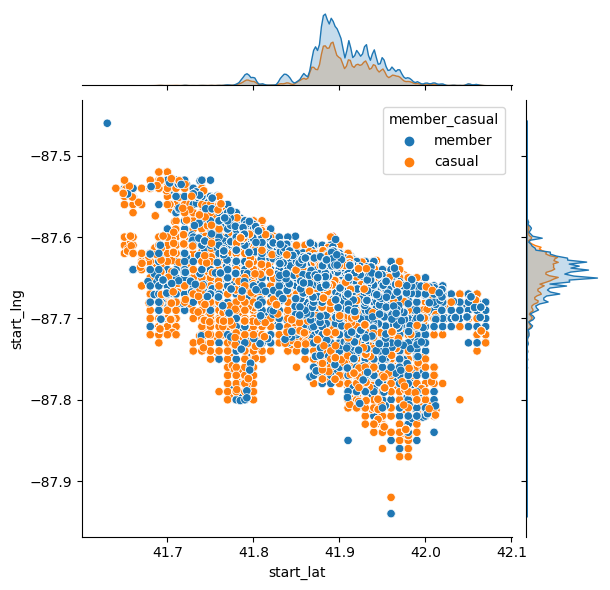

In [45]:
#What are the most frequented places and are there any differences between member and casual riders? - Not really
ax = plt.subplots(1,2)
ax[0] = sns.jointplot(data=df,x='start_lat',y='start_lng',hue='member_casual')

In [ ]:
#4 Average ride_length for casual and member riders

ride_length_casual = (df[df['member_casual']=='casual']['ended_at']-df[df['member_casual']=='casual']['started_at']).mean()
ride_length_member = (df[df['member_casual']=='member']['ended_at']-df[df['member_casual']=='member']['started_at']).mean()
ride_length = (df['ended_at']-df['started_at']).mean()
ride_length
df['ride_length'] = df['ended_at']-df['started_at']

<Axes: xlabel='member_casual', ylabel='ride_length'>

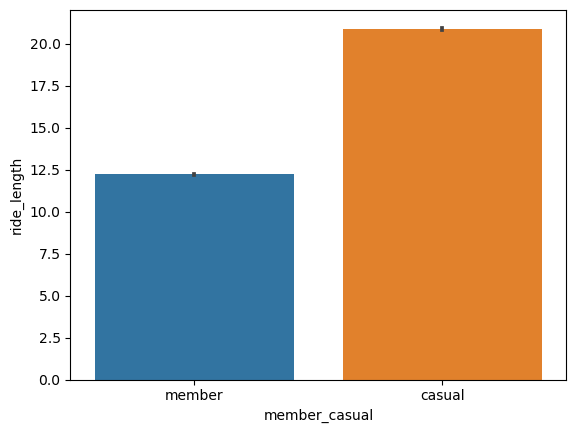

In [169]:
sns.barplot(data=df,x='member_casual',y=(df['ride_length']/pd.Timedelta(minutes=1)),estimator='mean')

<Axes: xlabel='started_at', ylabel='count'>

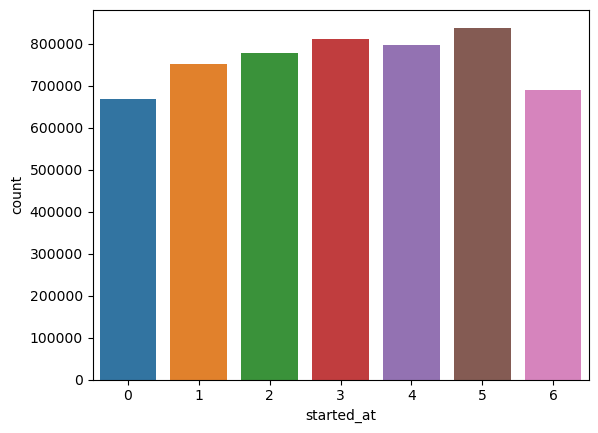

In [187]:
#5 Calculate users by the day of week

#Monday=0, Sunday=6
df['day_of_week']=df['started_at'].dt.dayofweek
sns.barplot(data=df,x=df['started_at'].dt.dayofweek.value_counts().index, y=df['started_at'].dt.dayofweek.value_counts())

<Axes: xlabel='day_of_week'>

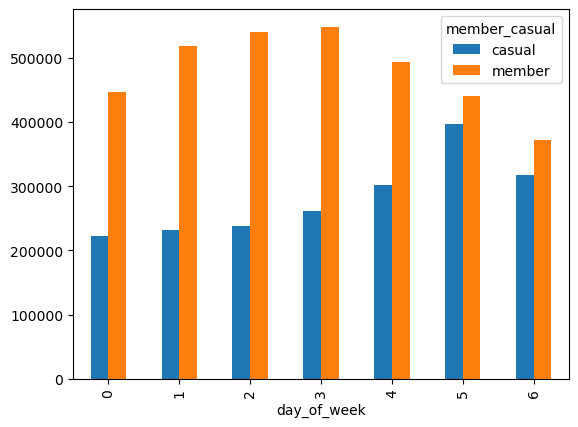

In [201]:
df.groupby(['member_casual','day_of_week']).count()['ride_id'].unstack(0).plot.bar()

<Axes: xlabel='weekday_weekend'>

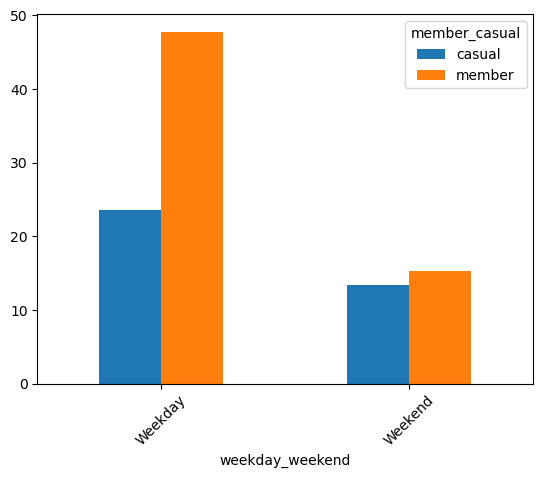

In [250]:
#6 Weekday or weekend ride?

df['weekday_weekend'] = df['day_of_week'].apply(lambda num: 'Weekend' if num > 4 else 'Weekday')

df.groupby(['member_casual','weekday_weekend']).count()['ride_id'].unstack(0).apply(lambda num: num/len(df)*100).plot.bar(rot=45) # Plot in percentage


<Axes: xlabel='day_of_week', ylabel='ride_length'>

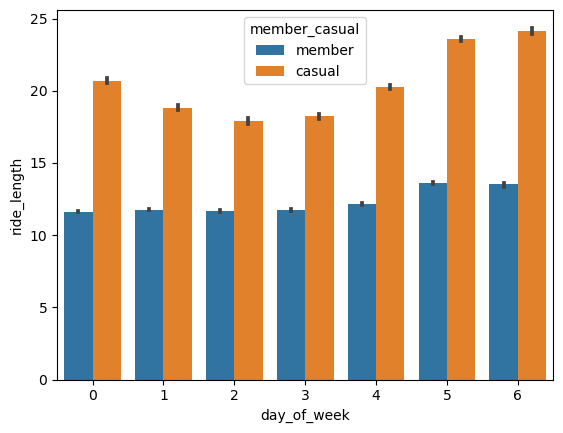

In [252]:
sns.barplot(data=df,x='day_of_week',y=df['ride_length']/pd.Timedelta(minutes=1),hue='member_casual')

# Findings

- Overview analysis
    - There are more member riders than casual riders
- Bicycle type analysis
    - Members chooses electric and classic bikes in equal ratio
    - Casual riders more likely to choose electric bikes
    - Docked type bikes are not significant
- Location analysis
    - No clear separation between the start and end locations of the different groups
    - No straightforward trend
    - The central places are more frequented, there are more rides
- Monthly time trend analysis
    - There are time trend but that do not provide useful information
    - Ride number increases in summer
    - The change between the member-casual riders is nearly equal
- Ride length analysis
    - Average ride length: 
    - Casual rider's ride length is 8 minutes longer than member riders
    - The member's ride length is consistent during a week, while casual's ride length is higher around the weekend
- Weekly time trend analysis
    - The total number of rides during a week is nearly constant
    - The member rides decreases at the end of a week, while the casual rides increases at the end of a week and it peeks at saturdays. The member rides peeks at wednesday and thursday.
    - The number of member riders on weekdays is twice as high as the number of casual riders
    - The number of member and casual riders are nearly the same at weekends